# **K-means - isotropic data**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

(300, 2)
(240, 2) (60, 2)


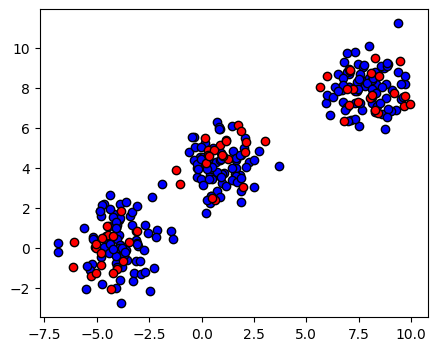

In [2]:
# Generate data
X, _ = make_blobs(n_samples = 300 , n_features = 2, random_state = 3)

# Create train / test splits
X_train, X_test = train_test_split(X, test_size = 0.2 , random_state = 3)

# Plot everything and print all shapes
_, ax = plt.subplots(figsize = (5,4))
# ax[0].scatter( _ , _ , c = _ , edgecolors='k', cmap=plt.cm.Paired)
ax.scatter( X_train[:,0] , X_train[:,1] , c = 'b' , edgecolors='k')
ax.scatter(  X_test[:,0] ,  X_test[:,1] , c = 'r' , edgecolors='k')

print (f'{X.shape}\n{X_train.shape} {X_test.shape}')

## **Elbow method**

In [3]:
# Create a distance function
def euclidean_distance(pt1, pt2):
  assert len(pt1) == 2, "Error! No 2d point"
  assert len(pt2) == 2, "Error! No 2d point"
  return (pt1[0] - pt2[0]) ** 2 + (pt1[1] - pt2[1]) ** 2

In [4]:
# Define num of clusters
clusters = [ 2, 3, 4, 5, 6, 7 , 8 , 9, 10 ] #Lista de clusters para probar
elbow_distances = [] #el resultado de la distorsión

# Eval kmeans over each num of clusters
for k in clusters :
  kmeans = KMeans(n_clusters = k )
  kmeans.fit( X_train )

  centroides = kmeans.cluster_centers_
  predictions = kmeans.predict( X_test )
  distance = 0

  for i in range(0, len(X_test)) :
    centroide = centroides[predictions[i]]
    distance += euclidean_distance( centroide , X_test[i] )

  elbow_distances.append(distance/len(X_test)) #es un promedio

print (len(elbow_distances), len(clusters))

9 9


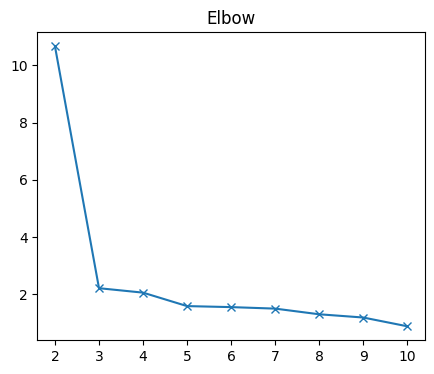

In [5]:
# Plot the elbow
_, ax = plt.subplots (figsize = (5,4))
ax.plot( clusters , elbow_distances , marker="x")
ax.set_title("Elbow");

## **Silhouette method**

In [6]:
from sklearn.metrics import silhouette_score

# Define num of clusters
clusters = [ 2, 3, 4, 5, 6, 7, 8 ,9, 10 ]
silhouette_distances = []

# Eval kmeans over each num of clusters
for k in clusters :
  kmeans = KMeans(n_clusters = k )
  kmeans.fit( X_train )

  predictions = kmeans.predict( X_test )
  distance = silhouette_score( X_test , predictions , metric="euclidean")

  silhouette_distances.append(distance)

print (len(silhouette_distances), len(clusters))

9 9


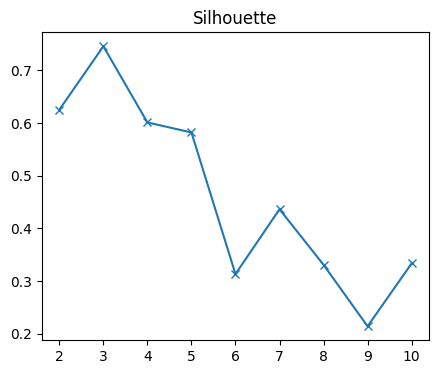

In [7]:
# Plot the silhouette
_, ax = plt.subplots (figsize = (5,4))
ax.plot( clusters , silhouette_distances , marker="x")
ax.set_title("Silhouette");

# **K-Means - Real data**

Download the fruits data [here](https://drive.google.com/file/d/1M8tiAWDZclABJN1Meq9oEHCLJTNyHdpP/view?usp=share_link)

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

(177, 2)
(141, 2) (36, 2)


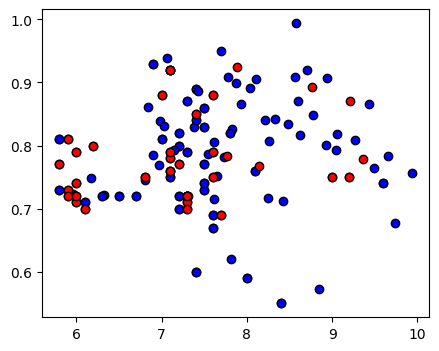

In [10]:
data = pd.read_csv('/content/drive/MyDrive/Machine learning/machine_learning/Sem_06/fruits_data_ext.csv', index_col=0)
X = data[['width', 'color_score']].values #dos caracteristicas y las convertí

X_train, X_test = train_test_split(X, test_size = 0.2 , random_state = 3)

_, ax = plt.subplots(figsize = (5,4))
ax.scatter( X_train[:,0] , X_train[:,1] , c = 'b' , edgecolors='k')
ax.scatter(  X_test[:,0] ,  X_test[:,1] , c = 'r' , edgecolors='k')

print (f'{X.shape}\n{X_train.shape} {X_test.shape}')

## **Elbow**

In [11]:
# Create a distance function
def euclidean_distance(pt1, pt2):
  assert len(pt1) == 2, "Error! No 2d point"
  assert len(pt2) == 2, "Error! No 2d point"
  return (pt1[0] - pt2[0]) ** 2 + (pt1[1] - pt2[1]) ** 2

# Create a function that computes the elbow for kmeans based in a list of clusters
def elbow_kmeans(clusters, data):
  elbow_distances = []

  for k in clusters:
      kmeans = KMeans(n_clusters=k, random_state=3)
      kmeans.fit(data)

      centroides = kmeans.cluster_centers_
      predictions = kmeans.predict(data)

      distance = 0
      for i in range(len(data)):
          centroide = centroides[predictions[i]]
          distance += euclidean_distance(centroide, data[i])

      elbow_distances.append(distance / len(data))

  return elbow_distances

In [ ]:
clusters = [ 2, 3, 4, 5, 6, 7 , 8 , 9, 10 ]
elbow_distances = elbow_kmeans( clusters , X_train )

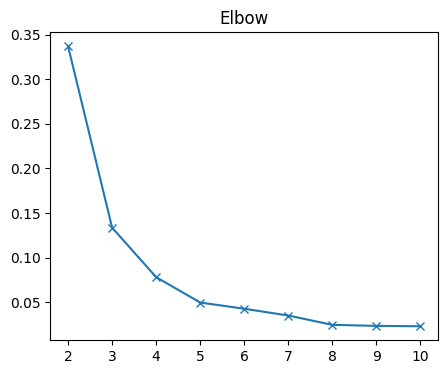

In [10]:
# Plot the elbow
_, ax = plt.subplots (figsize = (5,4))
ax.plot( clusters , elbow_distances , marker="x")
ax.set_title("Elbow");

## **Silhouette**

In [11]:
from sklearn.metrics import silhouette_score

In [19]:
def silhouette_kmeans(clusters, data):
  silhouette_distances = []  # Lista para almacenar los puntajes de silueta

  for k in clusters:
      kmeans = KMeans(n_clusters=k, random_state=1)
      kmeans.fit(data)

      predictions = kmeans.predict(data)  # Cambia a data en vez de X_test para un cálculo correcto
      distance = silhouette_score(data, predictions, metric="euclidean")

      silhouette_distances.append(distance)

  return silhouette_distances

In [21]:
clusters = [ 2, 3, 4, 5, 6, 7 , 8 , 9, 10 ]
silhouette_distances = silhouette_kmeans( clusters , X_train )

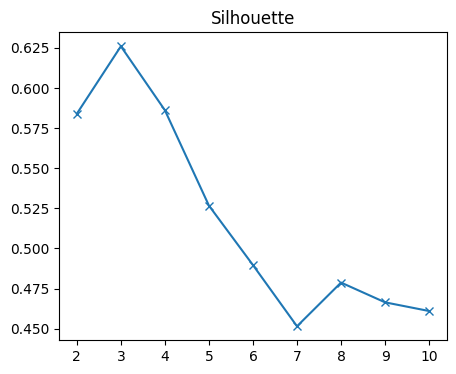

In [16]:
# Plot the silhouette
_, ax = plt.subplots (figsize = (5,4))
ax.plot( clusters , silhouette_distances , marker="x")
ax.set_title("Silhouette");

## **Comparison**

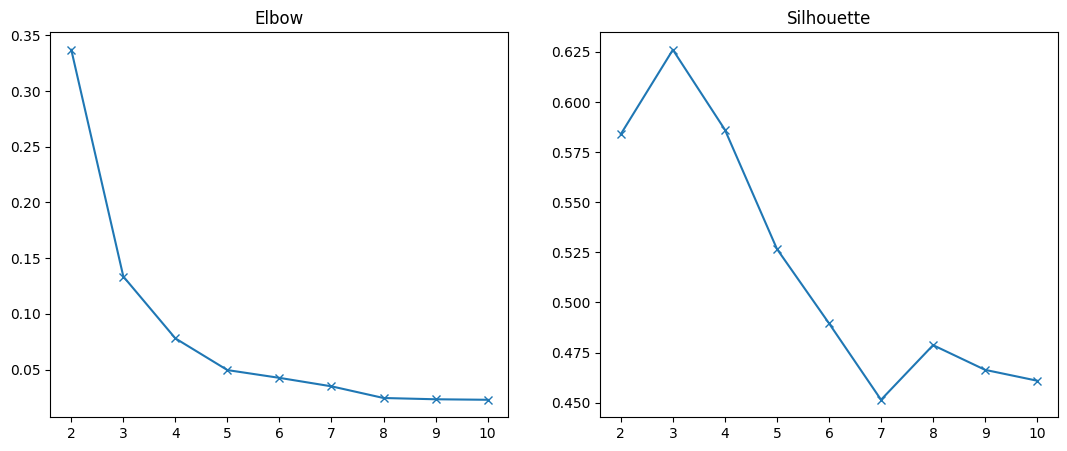

In [18]:
_, axes = plt.subplots(1,2, figsize=(13,5))
axes[0].plot(clusters , elbow_distances, marker = "x"); axes[0].set_title("Elbow")
axes[1].plot( clusters , silhouette_distances , marker = "x"); axes[1].set_title("Silhouette");

## **Clustering**

In [22]:
kmeans = KMeans (n_clusters = 3).fit( X_train )
centroids = kmeans.cluster_centers_
print(centroids)

[[7.38796697 0.78658936]
 [6.11059092 0.74011288]
 [8.89654681 0.78518448]]


In [23]:
predictions = kmeans.predict( X_test )

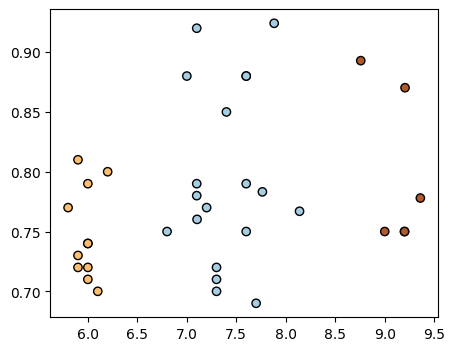

In [24]:
# Plot decision boundaries
_, ax = plt.subplots(figsize = (5,4))
ax.scatter(X_test[:,0], X_test[:,1], c= predictions, edgecolors='k', cmap ='Paired');